In [1]:
'''
Predict retention of an employee within an organization such that whether the employee will leave the company or continue with 
it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset
is HR_comma_sep.csv and first do data exploration and visualization, after this create a logistic regression model to predict 
Employee Attrition.
'''

'\nPredict retention of an employee within an organization such that whether the employee will leave the company or continue with \nit. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset\nis HR_comma_sep.csv and first do data exploration and visualization, after this create a logistic regression model to predict \nEmployee Attrition.\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
hr = pd.read_csv("HR_comma_sep.csv")
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
hr["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

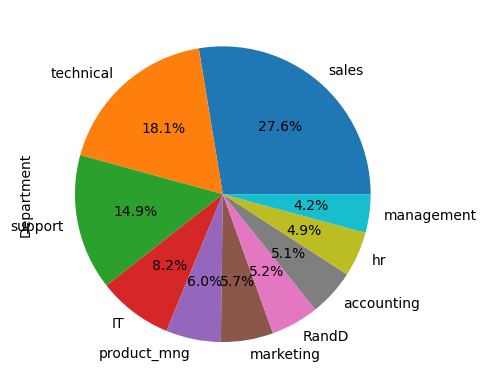

In [9]:
hr["Department"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")
plt.show()

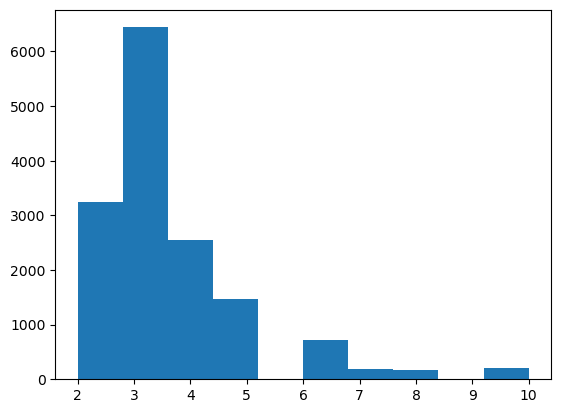

In [10]:
plt.hist(hr["time_spend_company"])
plt.show()

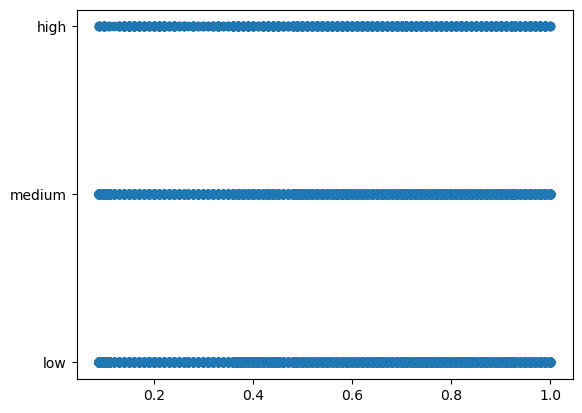

In [11]:
plt.scatter(x = hr["satisfaction_level"], y = hr["salary"])
plt.show()

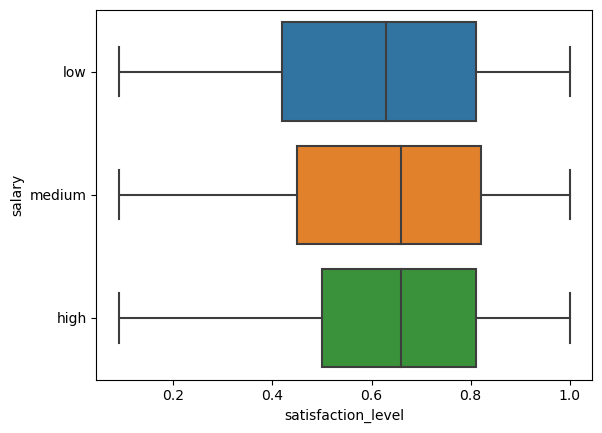

In [12]:
sns.boxplot(data = hr, x = "satisfaction_level", y = "salary")
plt.show()

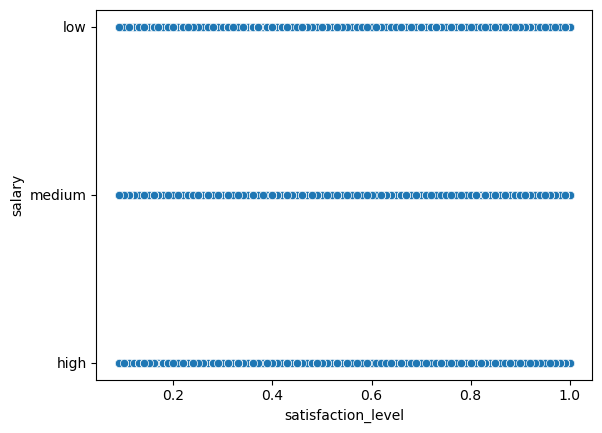

In [13]:
sns.scatterplot(x = hr["satisfaction_level"], y = hr["salary"])
plt.show()

In [14]:
hr_num = hr.select_dtypes(["int","float"])
hr_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [15]:
hr_cat = hr.select_dtypes(["object"])
hr_cat

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in hr_cat:
    hr_cat[col] = le.fit_transform(hr_cat[col])
hr_cat

,Department,salary
0,7,1
1,7,2
2,7,2
3,7,1
4,7,1
...,...,...
14994,8,1
14995,8,1
14996,8,1
14997,8,1


In [17]:
le.classes_

array(['high', 'low', 'medium'], dtype=object)

In [18]:
hr_new = pd.concat([hr_num, hr_cat], axis = 1)
hr_new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [19]:
x = hr_new.drop("left", axis = 1)
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


In [20]:
y = hr_new.iloc[:,-4]
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3416
           1       0.51      0.28      0.36      1084

    accuracy                           0.76      4500
   macro avg       0.66      0.60      0.61      4500
weighted avg       0.73      0.76      0.74      4500



In [24]:
lr = LogisticRegression(solver = "saga")
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3416
           1       0.00      0.00      0.00      1084

    accuracy                           0.76      4500
   macro avg       0.38      0.50      0.43      4500
weighted avg       0.58      0.76      0.65      4500



In [25]:
lr = LogisticRegression(solver = "liblinear")
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3416
           1       0.51      0.28      0.36      1084

    accuracy                           0.76      4500
   macro avg       0.66      0.60      0.61      4500
weighted avg       0.73      0.76      0.73      4500

